In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
df = pd.read_csv('/content/stock_data.csv')

In [3]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [4]:
df['Text'].values[0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [5]:
print(df.shape)

(5791, 2)


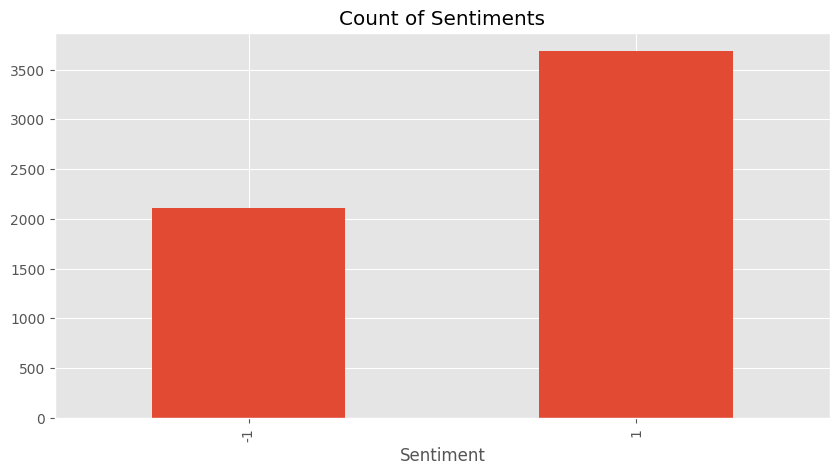

In [6]:
ax = df['Sentiment'].value_counts().sort_index().plot(kind='bar',title='Count of Sentiments',figsize=(10,5))
ax.set_xlabel('Sentiment')
plt.show()

In [7]:
sample_text = df['Text'][340]
print(sample_text)

AYI 1st negative operational cash flow quarter since quarter Novemebr 2008


In [8]:
sample = df['Sentiment'][340]
print(sample)

-1


In [9]:
tokens = nltk.word_tokenize(sample_text)
tokens

['AYI',
 '1st',
 'negative',
 'operational',
 'cash',
 'flow',
 'quarter',
 'since',
 'quarter',
 'Novemebr',
 '2008']

In [10]:
tagged = nltk.pos_tag(tokens)

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  AYI/$
  1st/CD
  negative/JJ
  operational/JJ
  cash/NN
  flow/NN
  quarter/NN
  since/IN
  quarter/NN
  Novemebr/NNP
  2008/CD)


In [ ]:
# First attempt via NaiveBayesClassifier

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores(sample_text)

{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5719}

In [15]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = i
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/5791 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})

df["Id"] = df.index + 1
vaders = vaders.merge(df,how='left')
vaders

,Id,neg,neu,pos,compound,Text,Sentiment
0,0,0.000,1.000,0.000,0.0000,NaN,NaN
1,1,0.000,0.756,0.244,0.7034,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1.0
2,2,0.000,0.857,0.143,0.3612,user: AAP MOVIE. 55% return for the FEA/GEED i...,1.0
3,3,0.000,1.000,0.000,0.0000,user I'd be afraid to short AMZN - they are lo...,1.0
4,4,0.000,1.000,0.000,0.0000,MNTA Over 12.00,1.0
...,...,...,...,...,...,...,...
5786,5786,0.266,0.734,0.000,-0.7003,"#TCS #share price jumps 9% on no #layoffs, #di...",1.0
5787,5787,0.150,0.695,0.155,0.0258,Industry body CII said #discoms are likely to ...,-1.0
5788,5788,0.083,0.833,0.083,0.0000,"#Gold prices slip below Rs 46,000 as #investor...",-1.0
5789,5789,0.000,1.000,0.000,0.0000,Workers at Bajaj Auto have agreed to a 10% wag...,1.0


In [17]:
 vaders.head()

,Id,neg,neu,pos,compound,Text,Sentiment
0,0,0.0,1.000,0.000,0.0000,NaN,NaN
1,1,0.0,0.756,0.244,0.7034,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1.0
2,2,0.0,0.857,0.143,0.3612,user: AAP MOVIE. 55% return for the FEA/GEED i...,1.0
3,3,0.0,1.000,0.000,0.0000,user I'd be afraid to short AMZN - they are lo...,1.0
4,4,0.0,1.000,0.000,0.0000,MNTA Over 12.00,1.0


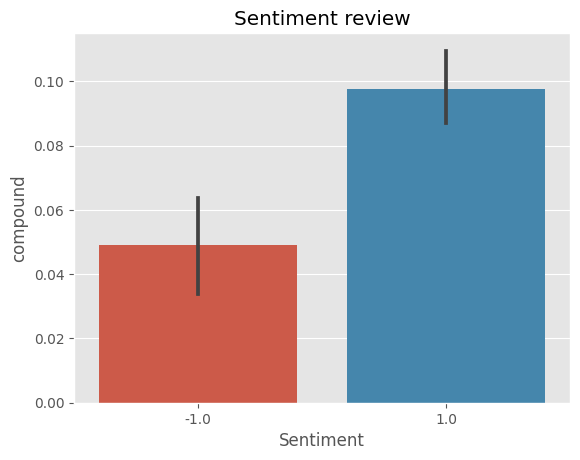

In [18]:
ax = sns.barplot(data=vaders, x='Sentiment', y='compound')
ax.set_title('Sentiment review')
plt.show()

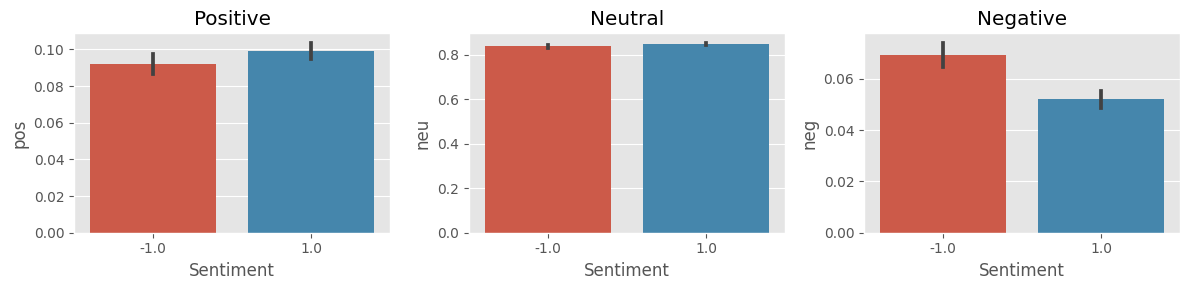

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [20]:
# !pip install tensorflow
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re, string, random

stop_words = stopwords.words('english')

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in nltk.pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens
# print(vaders.loc[1]);
print(remove_noise(nltk.word_tokenize(vaders.loc[340]['Text'])))

['ayi', 'q1', 'operational', 'cash', 'flow', 'turn', 'negative']


In [22]:
vaders = vaders.drop([0])
vaders

,Id,neg,neu,pos,compound,Text,Sentiment
1,1,0.000,0.756,0.244,0.7034,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1.0
2,2,0.000,0.857,0.143,0.3612,user: AAP MOVIE. 55% return for the FEA/GEED i...,1.0
3,3,0.000,1.000,0.000,0.0000,user I'd be afraid to short AMZN - they are lo...,1.0
4,4,0.000,1.000,0.000,0.0000,MNTA Over 12.00,1.0
5,5,0.000,1.000,0.000,0.0000,OI Over 21.37,1.0
...,...,...,...,...,...,...,...
5786,5786,0.266,0.734,0.000,-0.7003,"#TCS #share price jumps 9% on no #layoffs, #di...",1.0
5787,5787,0.150,0.695,0.155,0.0258,Industry body CII said #discoms are likely to ...,-1.0
5788,5788,0.083,0.833,0.083,0.0000,"#Gold prices slip below Rs 46,000 as #investor...",-1.0
5789,5789,0.000,1.000,0.000,0.0000,Workers at Bajaj Auto have agreed to a 10% wag...,1.0


In [23]:
vaders.insert(1, "Tagged", [99 for i in range(len(vaders.index))])
vaders

,Id,Tagged,neg,neu,pos,compound,Text,Sentiment
1,1,99,0.000,0.756,0.244,0.7034,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1.0
2,2,99,0.000,0.857,0.143,0.3612,user: AAP MOVIE. 55% return for the FEA/GEED i...,1.0
3,3,99,0.000,1.000,0.000,0.0000,user I'd be afraid to short AMZN - they are lo...,1.0
4,4,99,0.000,1.000,0.000,0.0000,MNTA Over 12.00,1.0
5,5,99,0.000,1.000,0.000,0.0000,OI Over 21.37,1.0
...,...,...,...,...,...,...,...,...
5786,5786,99,0.266,0.734,0.000,-0.7003,"#TCS #share price jumps 9% on no #layoffs, #di...",1.0
5787,5787,99,0.150,0.695,0.155,0.0258,Industry body CII said #discoms are likely to ...,-1.0
5788,5788,99,0.083,0.833,0.083,0.0000,"#Gold prices slip below Rs 46,000 as #investor...",-1.0
5789,5789,99,0.000,1.000,0.000,0.0000,Workers at Bajaj Auto have agreed to a 10% wag...,1.0


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [26]:
arr = []
count = 0
for i in range(len(vaders)):
  arr.append(remove_noise(nltk.word_tokenize(df.iloc[i].Text), stop_words))

vaders['Tagged'] = arr

vaders
# Processed Text is now stored under Tagged where the pre-processed text is stored under text in this dataset

,Id,Tagged,neg,neu,pos,compound,Text,Sentiment
1,1,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",0.000,0.756,0.244,0.7034,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1.0
2,2,"[user, aap, movie, 55, return, fea/geed, indic...",0.000,0.857,0.143,0.3612,user: AAP MOVIE. 55% return for the FEA/GEED i...,1.0
3,3,"[user, 'd, afraid, short, amzn, look, like, ne...",0.000,1.000,0.000,0.0000,user I'd be afraid to short AMZN - they are lo...,1.0
4,4,"[mnta, 12.00]",0.000,1.000,0.000,0.0000,MNTA Over 12.00,1.0
5,5,"[oi, 21.37]",0.000,1.000,0.000,0.0000,OI Over 21.37,1.0
...,...,...,...,...,...,...,...,...
5786,5786,"[tcs, share, price, jump, 9, layoff, dividend,...",0.266,0.734,0.000,-0.7003,"#TCS #share price jumps 9% on no #layoffs, #di...",1.0
5787,5787,"[industry, body, cii, say, discoms, likely, su...",0.150,0.695,0.155,0.0258,Industry body CII said #discoms are likely to ...,-1.0
5788,5788,"[gold, price, slip, rs, 46,000, investor, book...",0.083,0.833,0.083,0.0000,"#Gold prices slip below Rs 46,000 as #investor...",-1.0
5789,5789,"[workers, bajaj, auto, agree, 10, wage, cut, p...",0.000,1.000,0.000,0.0000,Workers at Bajaj Auto have agreed to a 10% wag...,1.0


In [27]:
vaders.head()

,Id,Tagged,neg,neu,pos,compound,Text,Sentiment
1,1,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",0.0,0.756,0.244,0.7034,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1.0
2,2,"[user, aap, movie, 55, return, fea/geed, indic...",0.0,0.857,0.143,0.3612,user: AAP MOVIE. 55% return for the FEA/GEED i...,1.0
3,3,"[user, 'd, afraid, short, amzn, look, like, ne...",0.0,1.000,0.000,0.0000,user I'd be afraid to short AMZN - they are lo...,1.0
4,4,"[mnta, 12.00]",0.0,1.000,0.000,0.0000,MNTA Over 12.00,1.0
5,5,"[oi, 21.37]",0.0,1.000,0.000,0.0000,OI Over 21.37,1.0


In [28]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(arr)

In [29]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[('aap', 926), ('http', 660), ('user', 642), ('short', 484), ('...', 409), ('high', 359), ('today', 343), ('day', 336), ("'s", 331), ('look', 327)]


In [30]:
...
def get_model(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tokens)

positive_tokens_for_model = get_model(vaders.loc[vaders['Sentiment'] == 1.0]['Tagged'])
negative_tokens_for_model = get_model(vaders.loc[vaders['Sentiment'] == -1.0]['Tagged'])



In [31]:
import random
positive_dataset = [(dict, 1)
                     for dict in positive_tokens_for_model]

negative_dataset = [(dict, -1)
                     for dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset
random.shuffle(dataset)
# dataset



In [32]:
train_data = dataset[:4342]
test_data = dataset[4342:]

In [33]:
from nltk import classify, NaiveBayesClassifier


In [34]:
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.7734806629834254
Most Informative Features
                   india = True               -1 : 1      =     17.4 : 1.0
                   rupee = True               -1 : 1      =     15.0 : 1.0
                   worst = True               -1 : 1      =     13.8 : 1.0
                     350 = True               -1 : 1      =     12.6 : 1.0
                    hits = True               -1 : 1      =     12.6 : 1.0
                     job = True               -1 : 1      =     12.6 : 1.0
                    shot = True               -1 : 1      =     11.8 : 1.0
                     nem = True               -1 : 1      =     11.4 : 1.0
                 bearish = True               -1 : 1      =     11.0 : 1.0
                    exit = True               -1 : 1      =     10.2 : 1.0
None


In [35]:
train_data[0]

({'compq': True,
  'spx': True,
  'ind': True,
  'bac': True,
  'c': True,
  'futures': True,
  'trade': True,
  'rise': True,
  'pending': True,
  'macro': True,
  'data': True},
 1)

In [36]:
# Second attempt to increase accuracy via LSTM model

In [37]:
!pip install tensorflow.keras


ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [38]:
type(dataset)

list

In [39]:
dataset[0:2]

[({'compq': True,
   'spx': True,
   'ind': True,
   'bac': True,
   'c': True,
   'futures': True,
   'trade': True,
   'rise': True,
   'pending': True,
   'macro': True,
   'data': True},
  1),
 ({'qatar': True,
   'begin': True,
   'market': True,
   'u.s.': True,
   'dollar-denominated': True,
   'bond': True,
   'first': True,
   'persian': True,
   'gulf': True,
   'state': True,
   'tap': True,
   'debt': True,
   'since': True,
   'theâ€¦': True,
   'http': True,
   '//t.co/uknszl5wzv': True},
  1)]

In [40]:
# dataset
# X_train_flattened
# y_train

In [256]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, SpatialDropout1D, Lambda, Bidirectional
from sklearn.model_selection import train_test_split


# Define a  model
def create_model(input_shape, num_classes):
  embed_dim = 128
  lstm_out = 196
  max_features = 2000

  model = Sequential([
    Embedding(vocab_size, 128, name="embedding"),
    Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)),
    Dense(16, activation='relu'),
    Dense(1,)
])

  return model


In [42]:
train_data[0]

({'compq': True,
  'spx': True,
  'ind': True,
  'bac': True,
  'c': True,
  'futures': True,
  'trade': True,
  'rise': True,
  'pending': True,
  'macro': True,
  'data': True},
 1)

In [43]:
list(train_data[1][0].keys())

['qatar',
 'begin',
 'market',
 'u.s.',
 'dollar-denominated',
 'bond',
 'first',
 'persian',
 'gulf',
 'state',
 'tap',
 'debt',
 'since',
 'theâ€¦',
 'http',
 '//t.co/uknszl5wzv']

In [44]:
def write_list_of_lists_to_file(file_path, list_of_lists):
    try:
        with open(file_path, 'w') as file:
            for inner_list in list_of_lists:
                line = " ".join(inner_list)  # Join the strings in the inner list with a space
                file.write("%s\n" % line)
        print(f"Successfully wrote {len(list_of_lists)} lines to {file_path}")
    except Exception as e:
        print(f"Error writing to file: {e}")


In [45]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  return tf.strings.regex_replace(lowercase,
                                  '[%s]' % re.escape(string.punctuation), '')
vocab_size = 4096
sequence_length = 10


vectorize_layer = layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

In [46]:
file_path = "temp.txt"
write_list_of_lists_to_file(file_path, [list(train_data[i][0].keys()) for i in range(len(train_data))])

Successfully wrote 4342 lines to temp.txt


In [47]:
text_ds = tf.data.TextLineDataset(file_path).filter(lambda x: tf.cast(tf.strings.length(x), bool))

In [48]:
vectorize_layer.adapt(text_ds.batch(1024))

In [49]:
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

In [50]:
# Vectorize the data in text_ds.
text_vector_ds = text_ds.batch(1024).prefetch(AUTOTUNE).map(vectorize_layer).unbatch()

In [51]:
text_vector_ds

<_UnbatchDataset element_spec=TensorSpec(shape=(10,), dtype=tf.int64, name=None)>

In [52]:
import tensorflow as tf

# Create an example unbatched dataset
unbatched_dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5])

# Convert the unbatched dataset to a list
dataset_list = list(unbatched_dataset.as_numpy_iterator())

# Print the result
print(dataset_list)

[1, 2, 3, 4, 5]


In [53]:
sequences = list(text_vector_ds.as_numpy_iterator())
tf.compat.v1.Session()
print(len(sequences))


4342


In [54]:
for seq in sequences[:5]:
  print(f"{seq} => {[i for i in seq]}")

[ 868  186 2080   23  240 1130   31  234    1 2786] => [868, 186, 2080, 23, 240, 1130, 31, 234, 1, 2786]
[  1 546  22  77   1 511 130   1   1 917] => [1, 546, 22, 77, 1, 511, 130, 1, 1, 917]
[   8    7  219  187  232  666 1258 1327 1990  386] => [8, 7, 219, 187, 232, 666, 1258, 1327, 1990, 386]
[3245 2246    1   86  183  132   88 2898    1   92] => [3245, 2246, 1, 86, 183, 132, 88, 2898, 1, 92]
[1676   29    1   14    4    1  840   92 1533 1594] => [1676, 29, 1, 14, 4, 1, 840, 92, 1533, 1594]


In [257]:
# Assuming each data point is represented by a fixed-size feature vector
input_shape = 10
num_classes = 1  # Binary classification, adjust for multiclass tasks

sentimental_model = create_model(input_shape, num_classes)

# Compile the model
sentimental_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [234]:
len(test_data)

1448

In [217]:
write_list_of_lists_to_file('test.txt', [list(test_data[i][0].keys()) for i in range(len(test_data))])

Successfully wrote 1448 lines to test.txt


In [218]:
X_test_ds = tf.data.TextLineDataset('test.txt').filter(lambda x: tf.cast(tf.strings.length(x), bool))

In [219]:
vectorize_layer.adapt(X_test_ds.batch(1024))

In [224]:
X_test_vector_ds = X_test_ds.batch(1024).prefetch(AUTOTUNE).map(vectorize_layer).unbatch()

In [225]:
X_test_seq = list(X_test_vector_ds.as_numpy_iterator())

In [222]:
len(X_test_seq)

4342

In [79]:
df.head()

,Text,Sentiment,Id
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,2
2,user I'd be afraid to short AMZN - they are lo...,1,3
3,MNTA Over 12.00,1,4
4,OI Over 21.37,1,5


In [80]:
# x_train = list(map(lambda x: list(x),sequences))
x_train = df[:4342]['Text']

In [198]:
x_train = np.asarray(sequences)

In [199]:
np.transpose(x_train)

array([[ 868,    1,    8, ..., 2961,  450,    5],
       [ 186,  546,    7, ...,   18, 2463,   62],
       [2080,   22,  219, ...,  424,   97,  244],
       ...,
       [ 234,    1, 1327, ...,    0,    0,    0],
       [   1,    1, 1990, ...,    0,    0,    0],
       [2786,  917,  386, ...,    0,    0,    0]])

In [178]:
x_train

array([[ 868,  186, 2080, ...,  234,    1, 2786],
       [   1,  546,   22, ...,    1,    1,  917],
       [   8,    7,  219, ..., 1327, 1990,  386],
       ...,
       [2961,   18,  424, ...,    0,    0,    0],
       [ 450, 2463,   97, ...,    0,    0,    0],
       [   5,   62,  244, ...,    0,    0,    0]])

In [191]:
# x_train = np.asarray([[i] for i in x_train])

In [98]:
y_train = df[:4342]['Sentiment']

In [99]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
4337   -1
4338   -1
4339    1
4340    1
4341    1
Name: Sentiment, Length: 4342, dtype: int64

In [84]:
X_test = df[4342:]['Text']

In [107]:
type(X_test_seq)

list

In [108]:
type(X_test_seq[0])

numpy.ndarray

In [229]:
X_test = np.asarray(X_test_seq)

In [232]:
np.transpose(X_test)

array([[   6, 1855,  118, ...,   40, 2495,   77],
       [ 340, 1634,  233, ...,  247,   67, 2767],
       [1428, 2744,    1, ..., 2731,    9,  126],
       ...,
       [   1,    0,    0, ...,    0,  347, 1443],
       [ 534,    0,    0, ...,    0, 1580, 2035],
       [ 114,    0,    0, ...,    0,  324, 1520]])

In [231]:
X_test

array([[   6,  340, 1428, ...,    1,  534,  114],
       [1855, 1634, 2744, ...,    0,    0,    0],
       [ 118,  233,    1, ...,    0,    0,    0],
       ...,
       [  40,  247, 2731, ...,    0,    0,    0],
       [2495,   67,    9, ...,  347, 1580,  324],
       [  77, 2767,  126, ..., 1443, 2035, 1520]])

In [92]:
y_test = df[4342:]['Sentiment']

In [239]:
y_test = np.asarray([test_data[i][1] for i in range(len(test_data))])

In [237]:
len(y_test)

1448

In [252]:
# Train the model
sentimental_model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
136/136 [==============================] - 29s 146ms/step - loss: 0.6827 - accuracy: 0.0378
Epoch 2/10
136/136 [==============================] - 21s 153ms/step - loss: 0.4119 - accuracy: 0.2319
Epoch 3/10
136/136 [==============================] - 19s 142ms/step - loss: -0.4812 - accuracy: 0.2667
Epoch 4/10
136/136 [==============================] - 19s 142ms/step - loss: -1.2645 - accuracy: 0.3722
Epoch 5/10
136/136 [==============================] - 19s 137ms/step - loss: -1.2471 - accuracy: 0.3848
Epoch 6/10
136/136 [==============================] - 20s 150ms/step - loss: -1.3517 - accuracy: 0.4012
Epoch 7/10
136/136 [==============================] - 19s 138ms/step - loss: -1.5606 - accuracy: 0.4641
Epoch 8/10
136/136 [==============================] - 19s 139ms/step - loss: -2.0097 - accuracy: 0.5032
Epoch 9/10
136/136 [==============================] - 20s 150ms/step - loss: 1.0251 - accuracy: 0.3213
Epoch 10/10
136/136 [==============================] - 20s 148ms/st

In [253]:
# Evaluate the model on the test set
eval_results = sentimental_model.evaluate(X_test, y_test)
print("Test Accuracy:", eval_results[1])

46/46 [==============================] - 1s 17ms/step - loss: 9.3394 - accuracy: 0.4627
Test Accuracy: 0.46270719170570374


CONCLUSION:
In conclusion, using the NaiveBayesClassifier model is better than using the LSTM model for conducting sentimental analysis, as the accuracy is 77.3% as compared to 46.3%. 